In [3]:
# Import necessary libraries for data analysis, visualization, and modeling
import pandas as pd                    # data manipulation
import numpy as np                     # numerical computations
import matplotlib.pyplot as plt        # plotting
import seaborn as sns                  # statistical data visualization

# Scikit-learn libraries for machine learning modeling and evaluation
from sklearn.model_selection import train_test_split   # splitting data into train/test sets
from sklearn.preprocessing import StandardScaler       # feature scaling
from sklearn.tree import DecisionTreeClassifier, plot_tree  # decision tree model and visualization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay


In [4]:
# Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
# The dataset on the URL has no header row, so we specify column names manually
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, header=None, names=column_names)

# Preview the first 5 rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())
# Display the shape of the dataset
print(f"Dataset shape (rows, columns): {df.shape}")


First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset shape (rows, columns): (768, 9)


In [12]:
# Basic information about the dataset
print("\nDataset Info:")
df.info()

# Statistical summary of the dataset
print("\nStatistical Summary:")
display(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Define columns where 0 should be considered missing
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zero values with NaN in the defined columns
for col in cols_with_missing:
    df[col] = df[col].replace(0, np.nan)

# Check the count of missing values in each column after replacement
print("\nMissing values per column after cleaning:")
print(df.isna().sum())



Missing values per column after cleaning:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


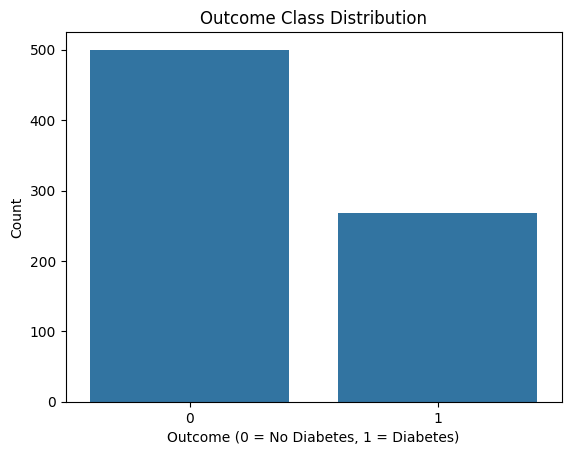

In [14]:
# Visualise the class distribution of the target variable 'Outcome'
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Class Distribution')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


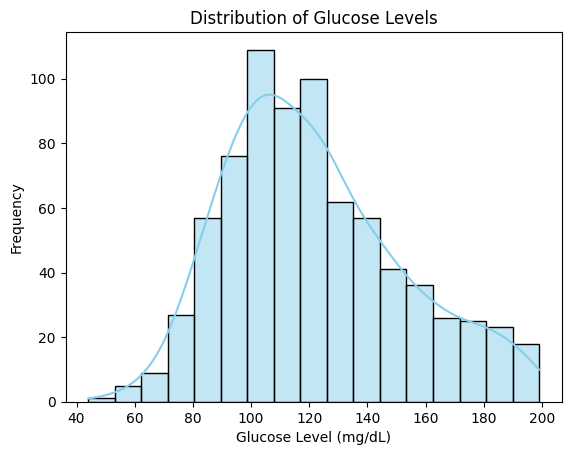

In [15]:
# Histogram of Glucose values
sns.histplot(df['Glucose'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('Frequency')
plt.show()


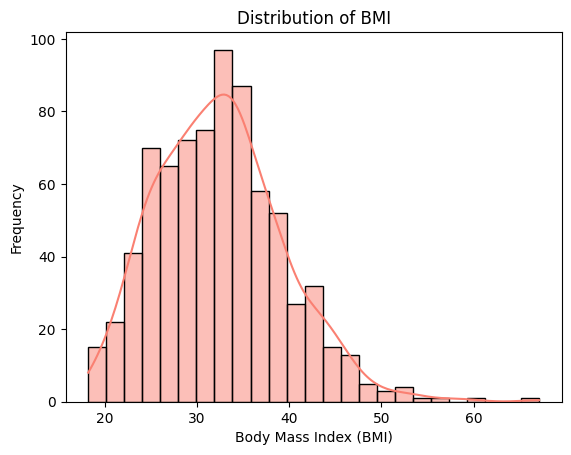

In [16]:
# Histogram of BMI values
sns.histplot(df['BMI'].dropna(), kde=True, color='salmon')
plt.title('Distribution of BMI')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.show()


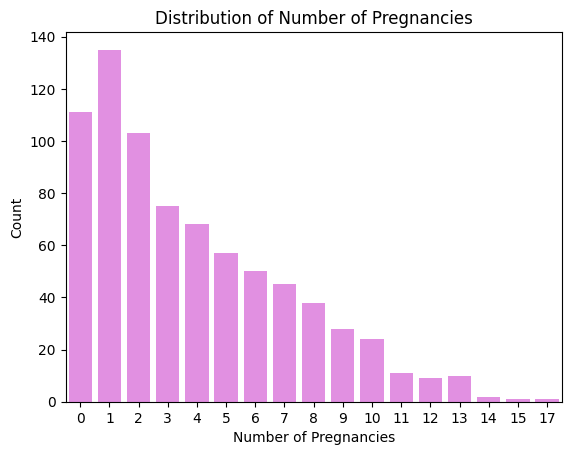

In [17]:
# Countplot of number of pregnancies
sns.countplot(x='Pregnancies', data=df, color='violet')
plt.title('Distribution of Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.show()

<ipython-input-18-abca8d7f682a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corr[col].fillna(df_corr[col].median(), inplace=True)


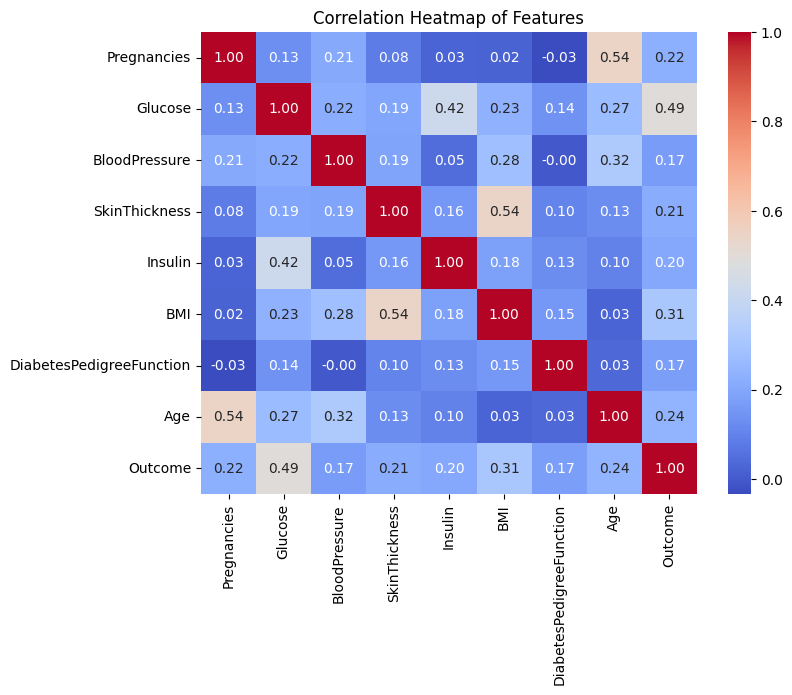

In [18]:
# Compute correlation matrix (fill missing values with median to avoid NaNs in correlation)
df_corr = df.copy()
for col in cols_with_missing:
    df_corr[col].fillna(df_corr[col].median(), inplace=True)
corr_matrix = df_corr.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


In [10]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 614 samples
Test set size: 154 samples


In [19]:
# Impute missing values in training data with median, and apply to test data
for col in cols_with_missing:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X_test[col].fillna(median_val, inplace=True)

# Feature Scaling (optional, especially for non-tree models)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Verify that no missing values remain after imputation
print("Missing values in X_train after imputation:", X_train_scaled.isna().sum().sum())
print("Missing values in X_test after imputation:", X_test_scaled.isna().sum().sum())


Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0


<ipython-input-19-c6bc03f63125>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
<ipython-input-19-c6bc03f63125>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Trained Decision Tree depth: 16, leaves: 115


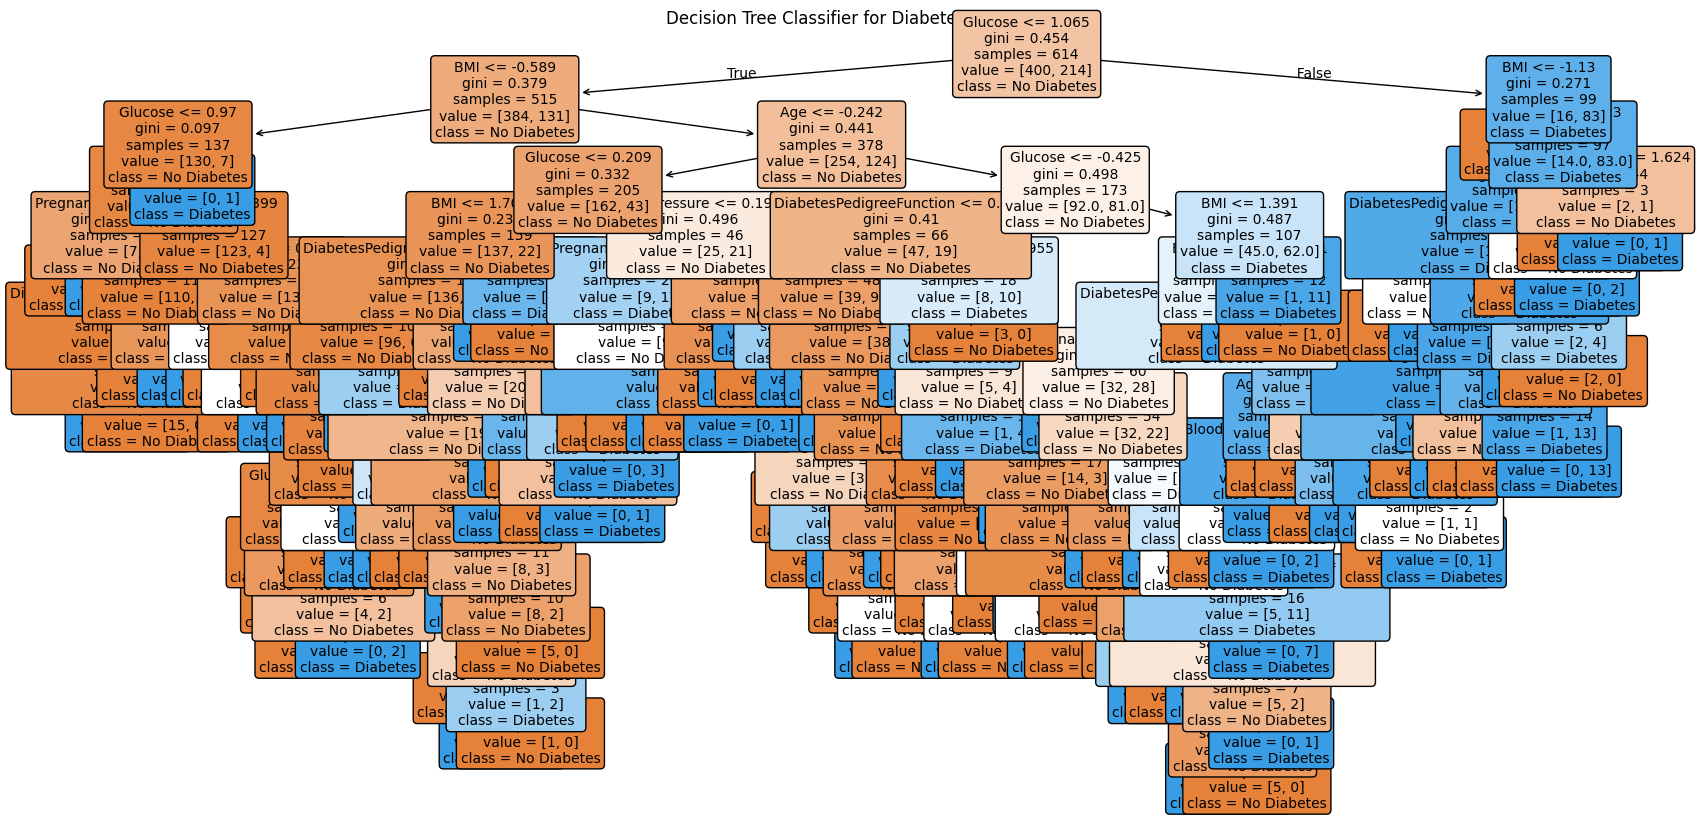

In [20]:
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Optional: print tree depth and number of leaves to see model complexity
print(f"Trained Decision Tree depth: {clf.get_depth()}, leaves: {clf.get_n_leaves()}")


from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=["No Diabetes", "Diabetes"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Classifier for Diabetes Prediction")
plt.show()


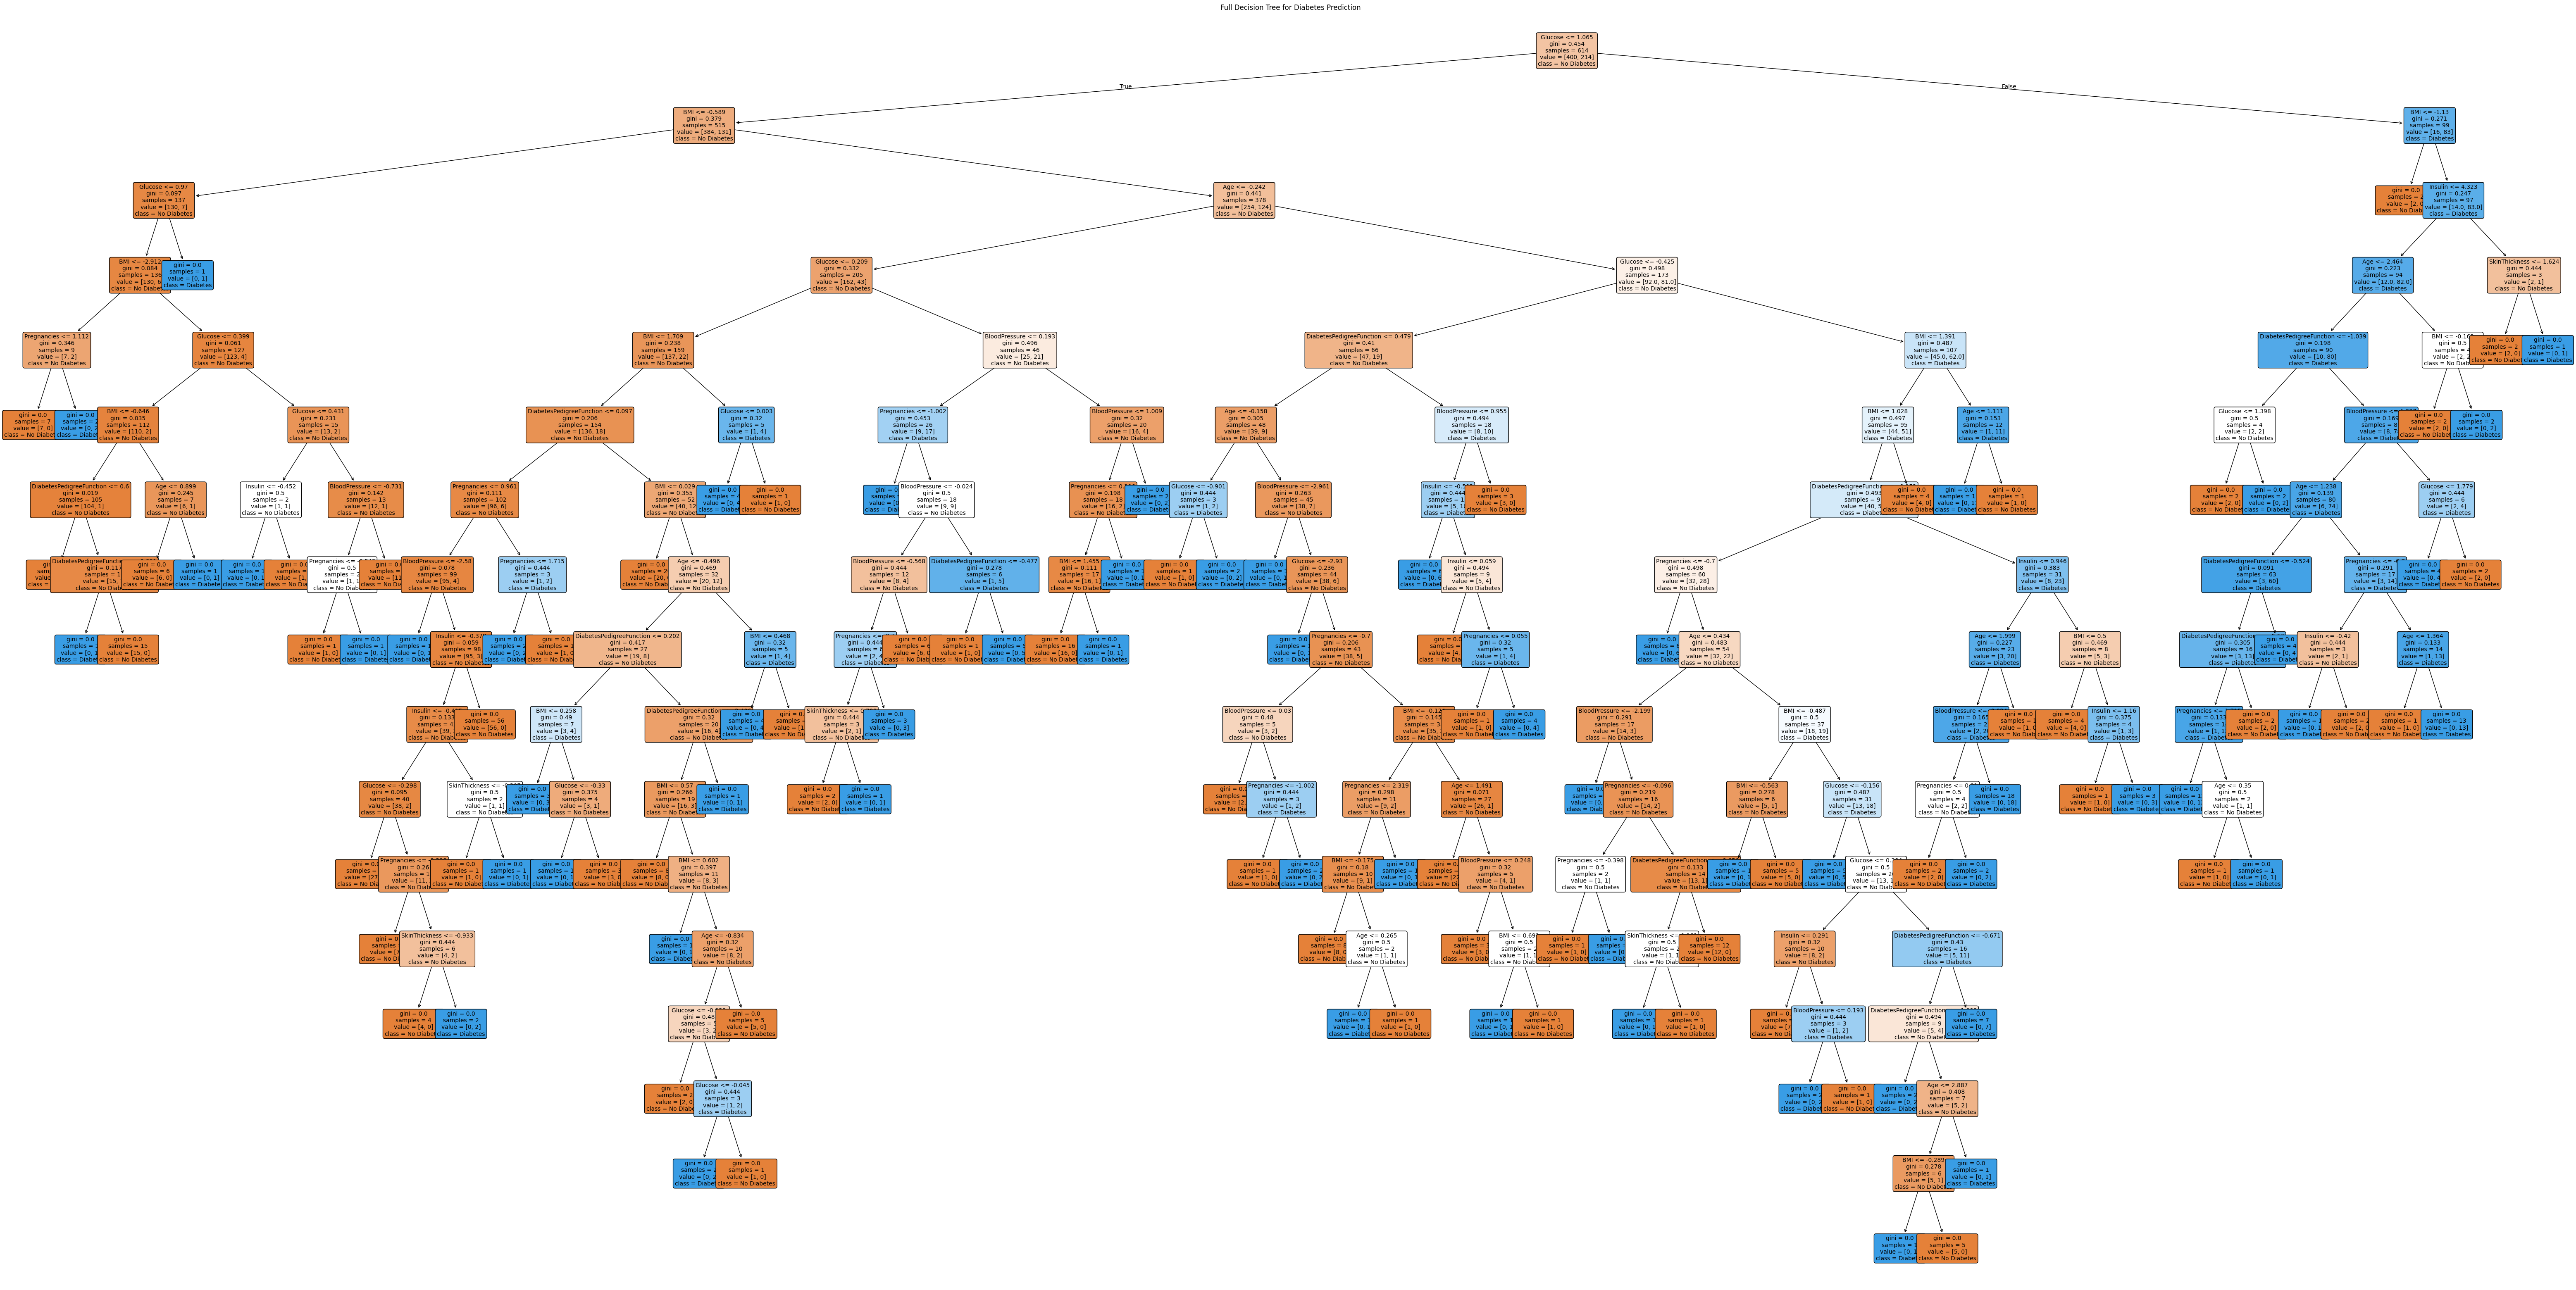

In [25]:
plt.figure(figsize=(80, 40))  # much larger canvas
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=["No Diabetes", "Diabetes"],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Full Decision Tree for Diabetes Prediction")
plt.savefig("full_decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()


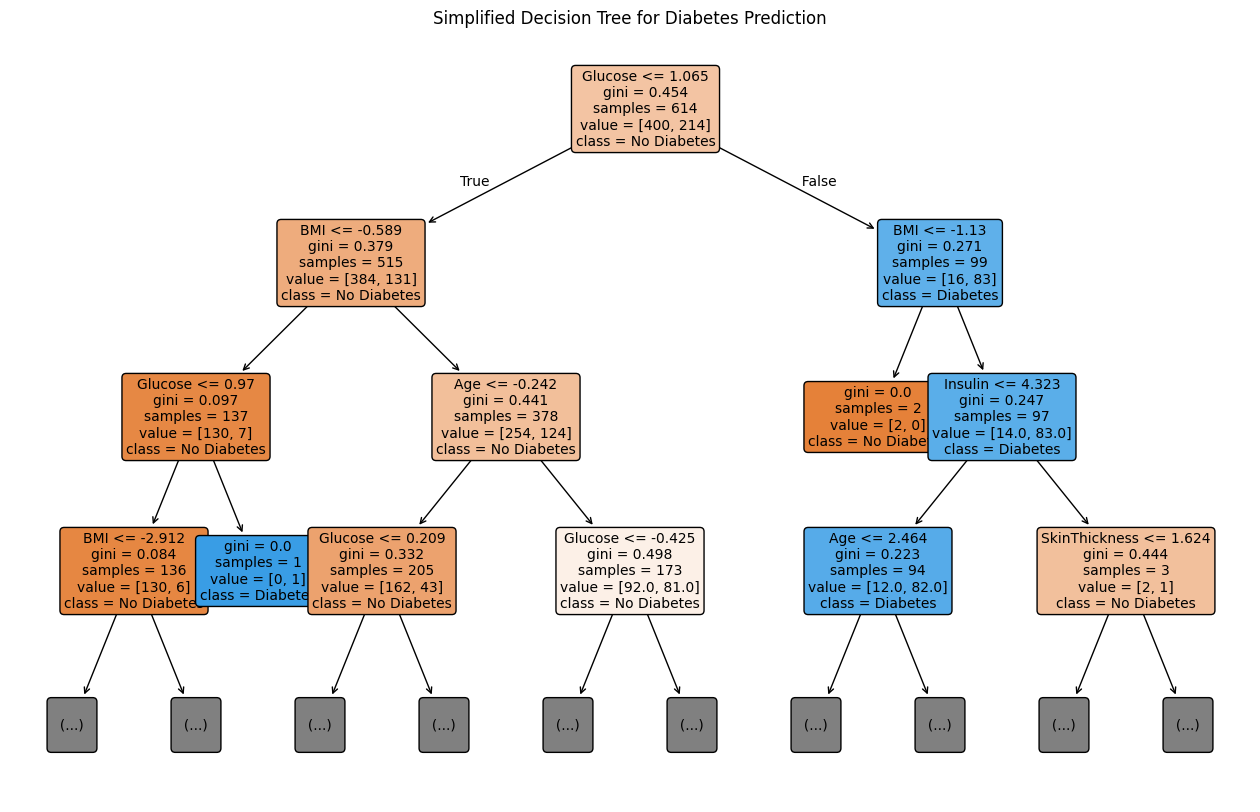

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=["No Diabetes", "Diabetes"],
          filled=True,
          rounded=True,
          max_depth=3,  # limit depth for readability
          fontsize=10)
plt.title("Simplified Decision Tree for Diabetes Prediction")
plt.show()

Test Accuracy: 72.08%


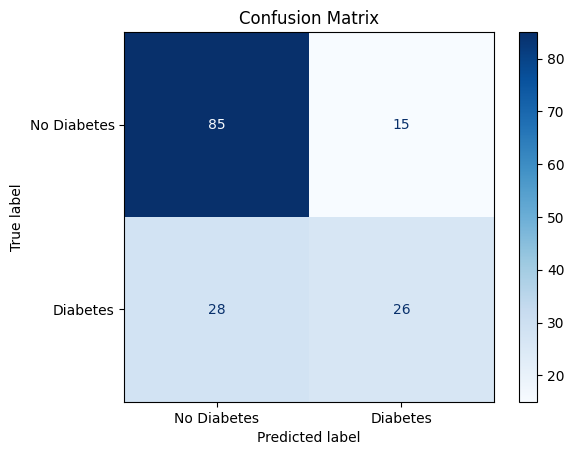

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.75      0.85      0.80       100
    Diabetes       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



In [22]:
# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))


AUC Score: 0.67


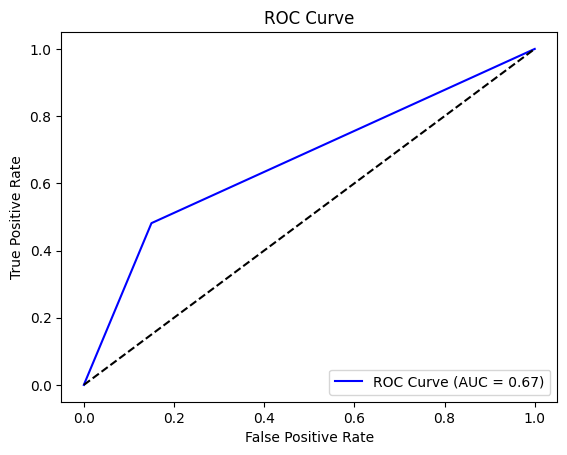

In [23]:
# Compute predicted probabilities for the positive class
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Calculate false positive rate and true positive rate for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.2f}")

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal line for random chance
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
